In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [16]:
df=pd.read_csv('glass.csv')
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [18]:
df.dtypes

Id                 int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type_of_glass      int64
dtype: object

In [19]:
#removing unnecessary column
df.drop('Id',axis=1,inplace=True)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [20]:
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

 no null value we are good to go

In [21]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The features are not on the same scale also there are lots of outlier present we will remove it 

<AxesSubplot:xlabel='Type_of_glass', ylabel='count'>

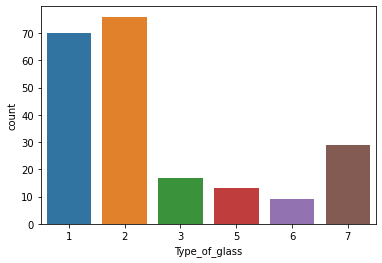

In [22]:
sns.countplot(data=df,x='Type_of_glass')

In [23]:
#Frequency table
df['Type_of_glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type_of_glass, dtype: int64

our data is imbalanced we have to balanced it using SMOTE

# Data Visualization

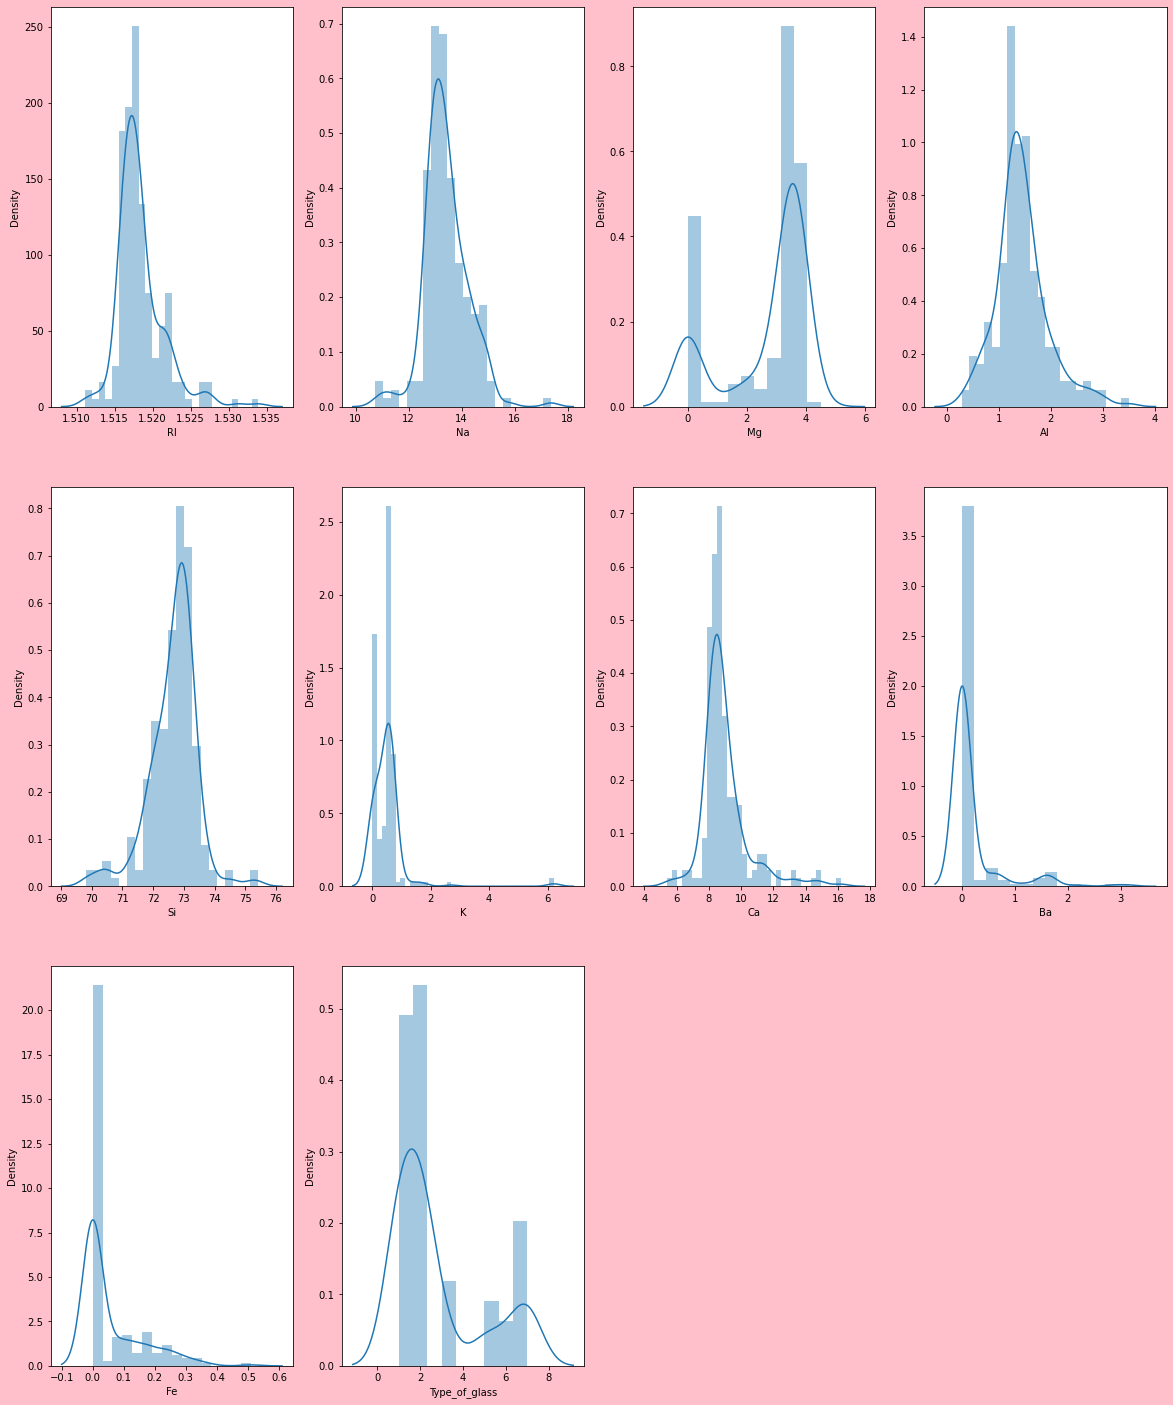

In [25]:
plt.figure(figsize=(20,25),facecolor = 'pink')
plotnumber = 1

for column in df:
    if plotnumber<=10:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    
    plotnumber+=1 
plt.show() 

Most of the feature are not normally distributed it is because of outlier present in it

array([[<AxesSubplot:title={'center':'RI'}>,
        <AxesSubplot:title={'center':'Na'}>,
        <AxesSubplot:title={'center':'Mg'}>],
       [<AxesSubplot:title={'center':'Al'}>,
        <AxesSubplot:title={'center':'Si'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'Ca'}>,
        <AxesSubplot:title={'center':'Ba'}>,
        <AxesSubplot:title={'center':'Fe'}>],
       [<AxesSubplot:title={'center':'Type_of_glass'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

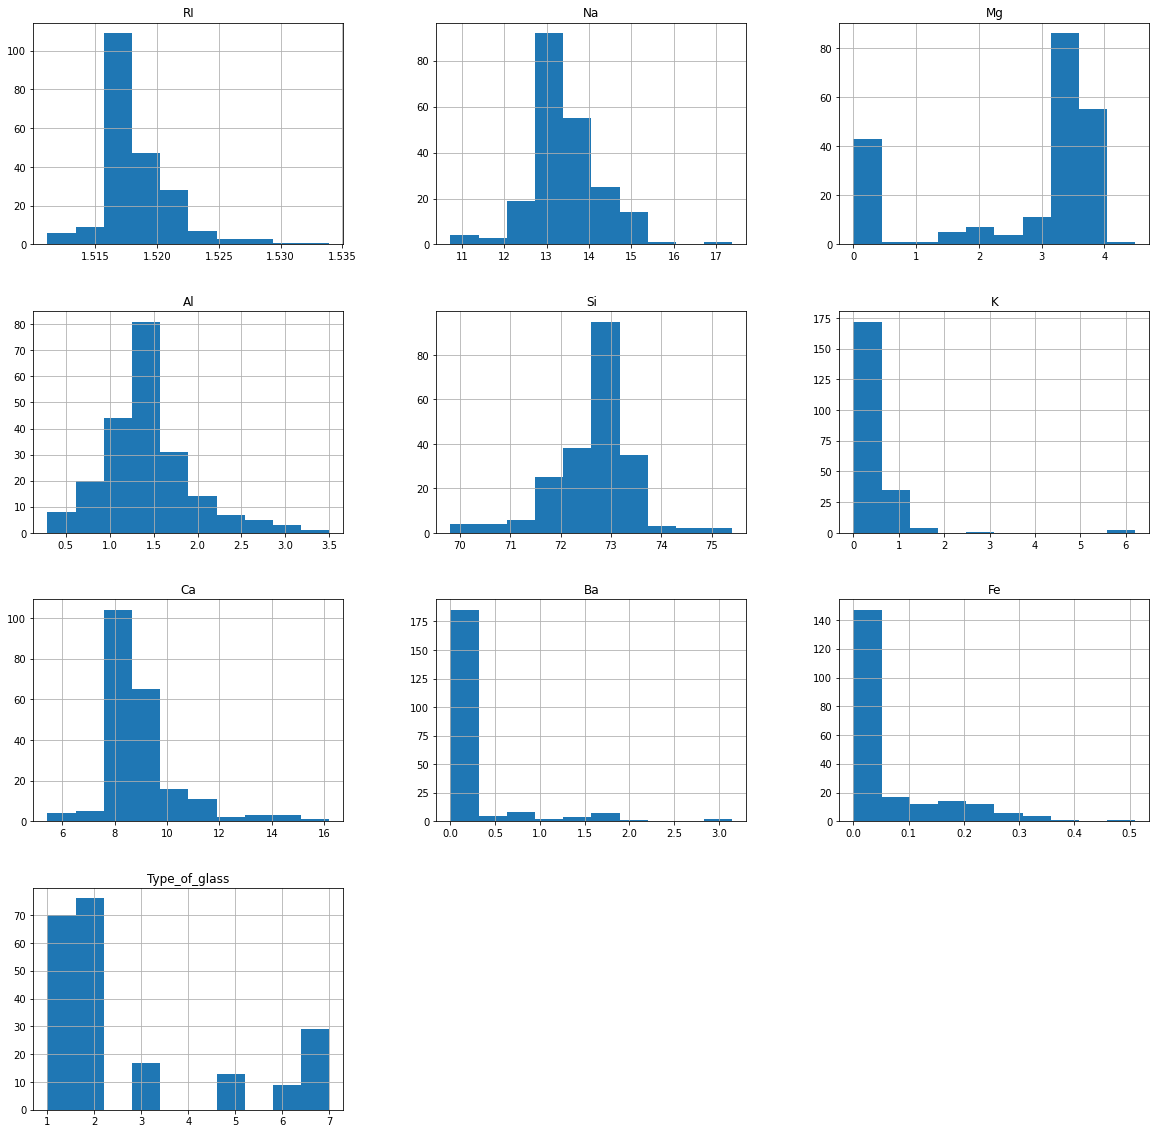

In [26]:
df.hist(bins=10, figsize=(20,20))

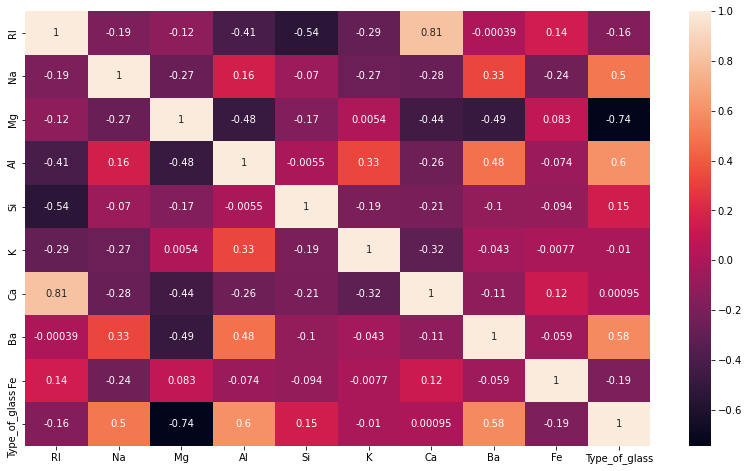

In [28]:
df_corr = df.corr()

plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot= True)
plt.show()

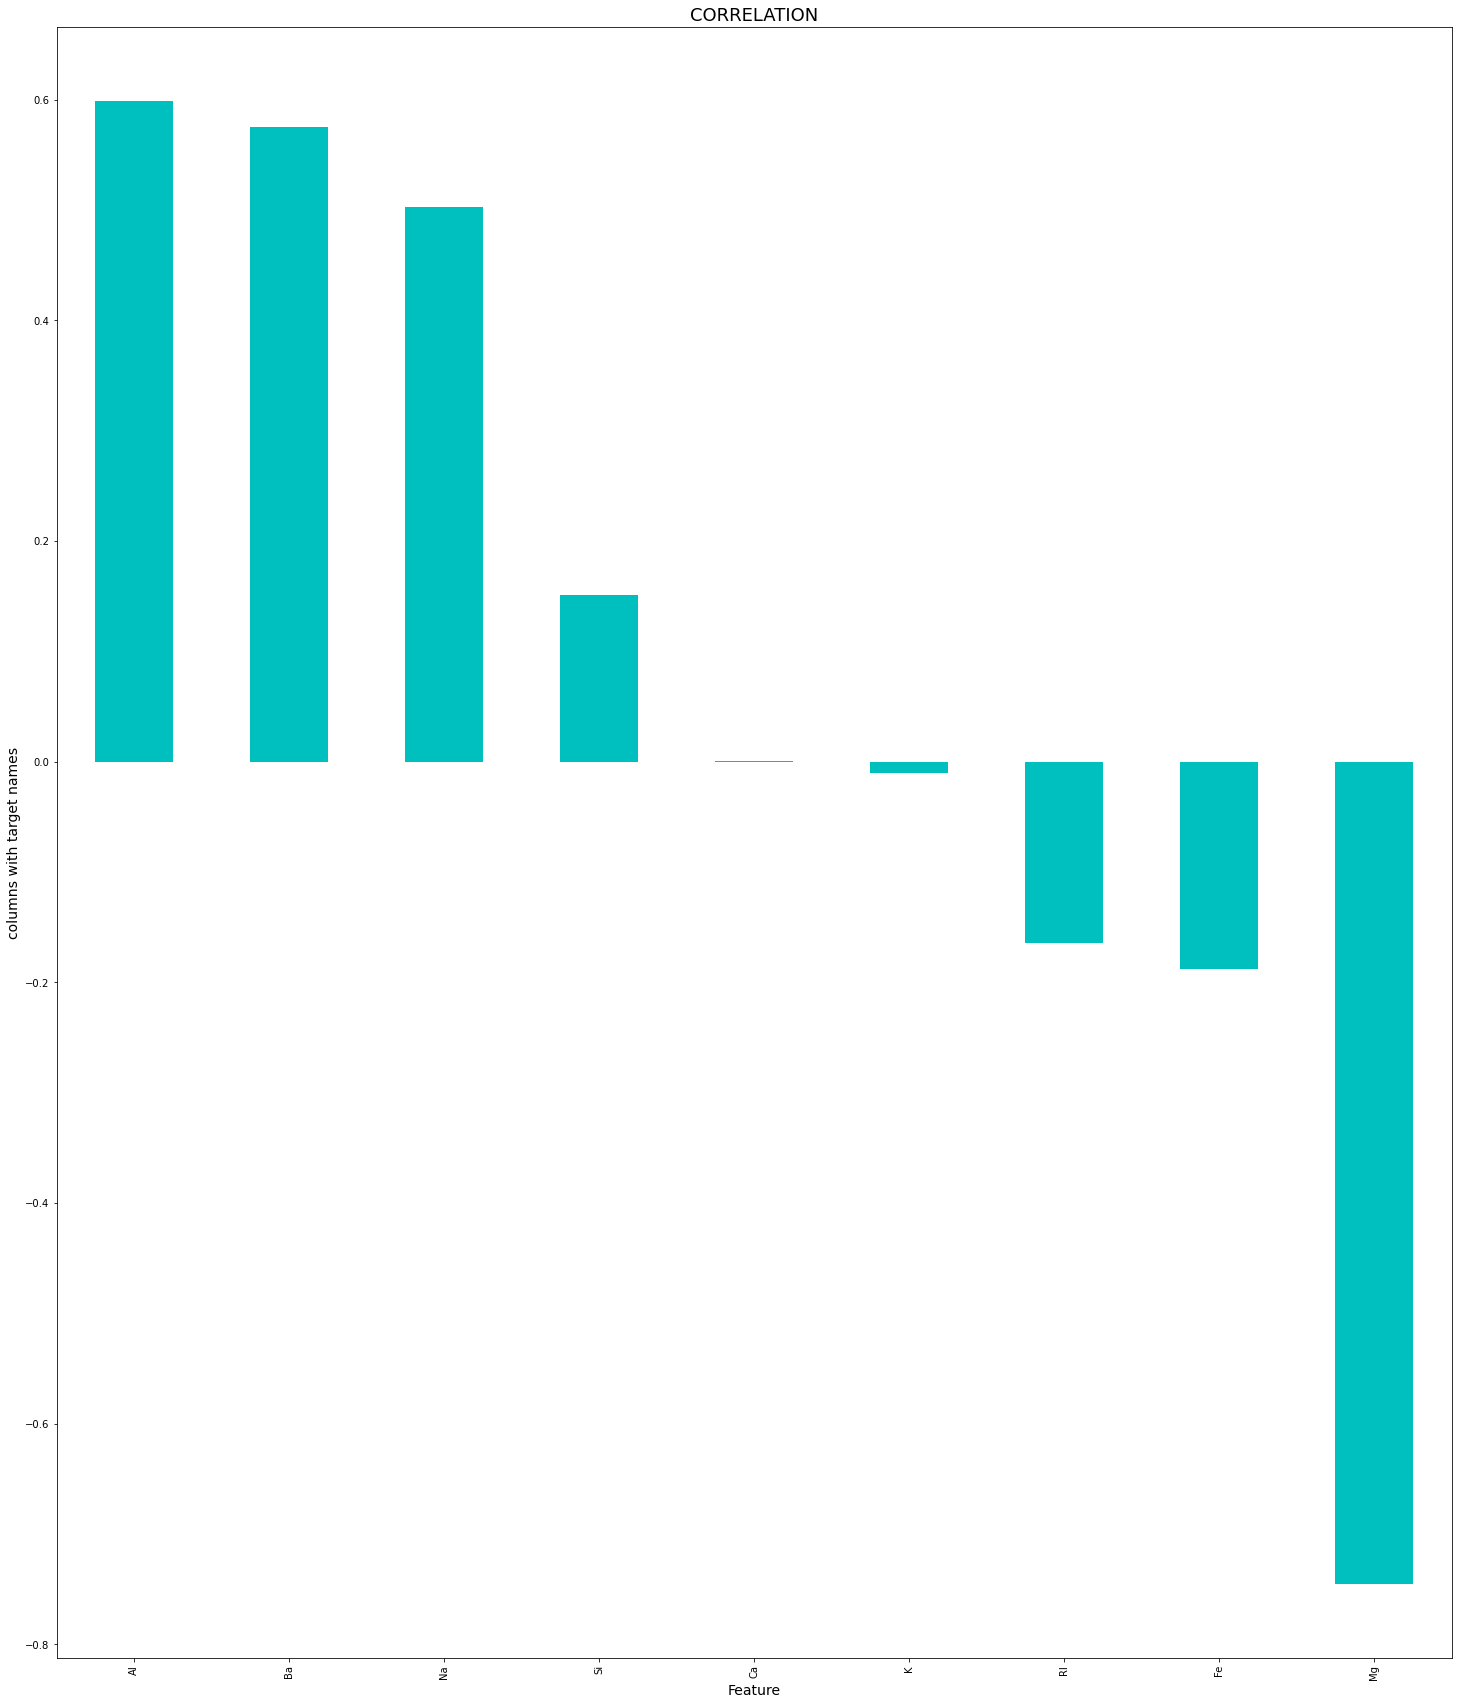

In [32]:
#checking the columns which are positively and negatively correlated
plt.figure(figsize=(25,30))
df.corr()['Type_of_glass'].sort_values(ascending=False).drop(['Type_of_glass']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

from heatmap we can visualise that there is not such multicolinearity issue

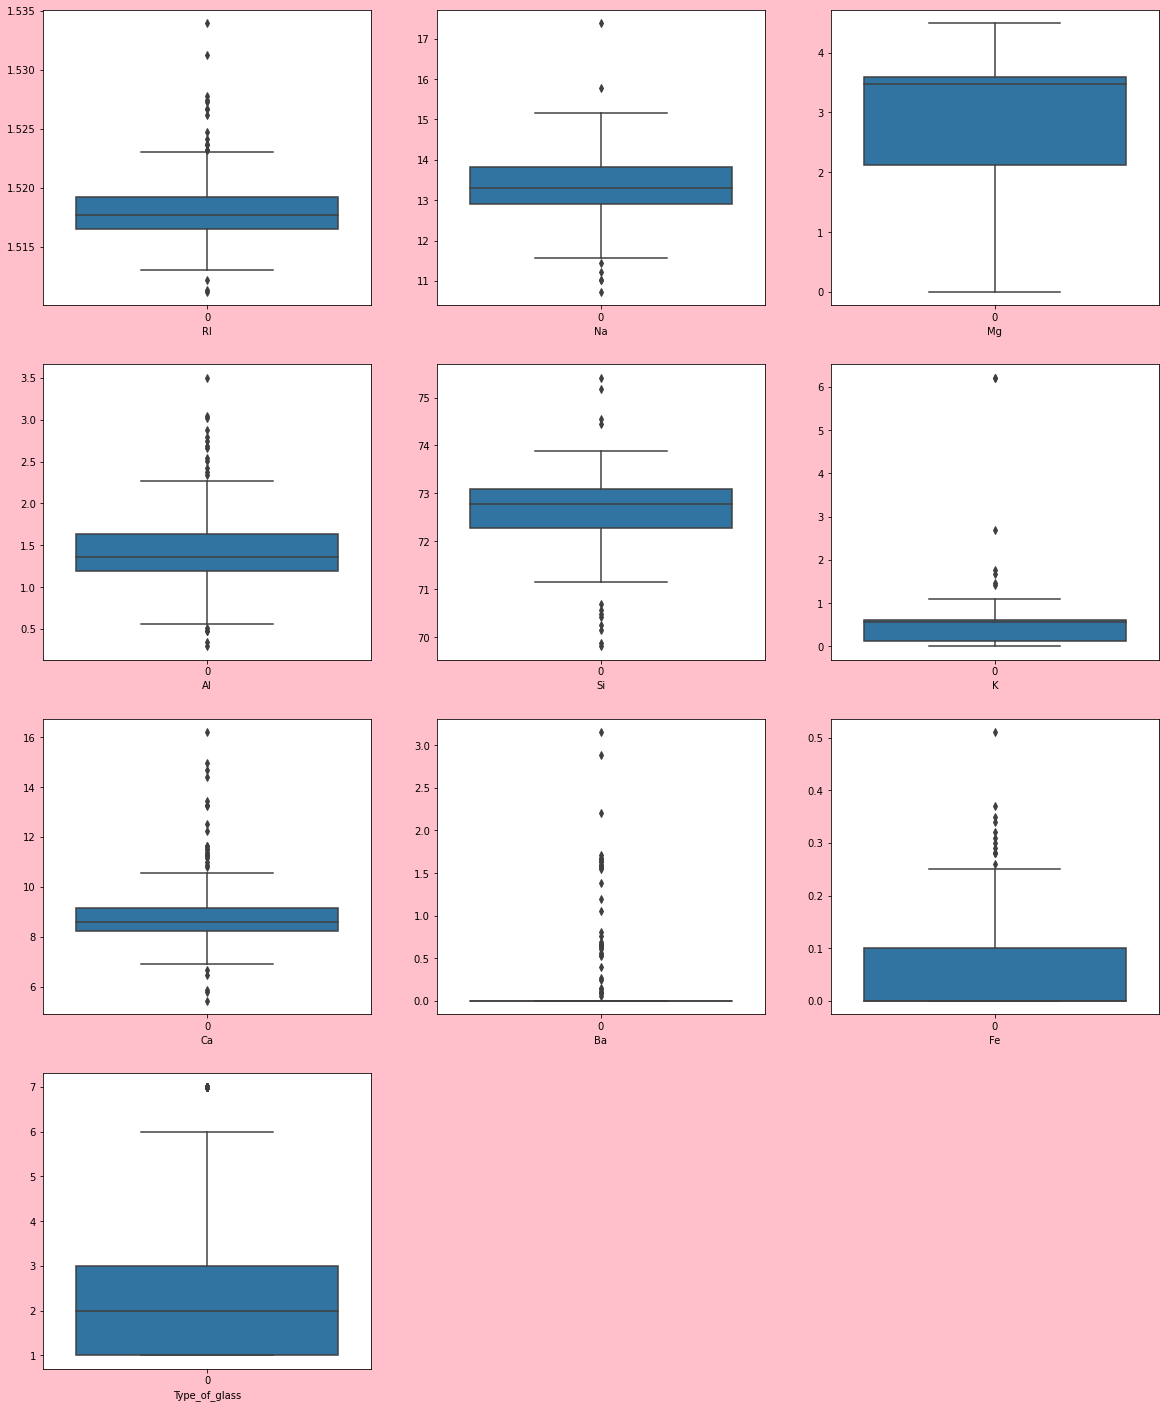

In [33]:
plt.figure(figsize=(20,25),facecolor = 'pink')
graph = 1

for column in df:
    if graph<=10:
        ax = plt.subplot(4,3,graph)
        sns.boxplot(data = df[column])
        plt.xlabel(column)
    
    graph+=1
plt.show() 

expept mg all the feature has the outlier present we will remove it by zscore method

In [36]:
#z score method
z = np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


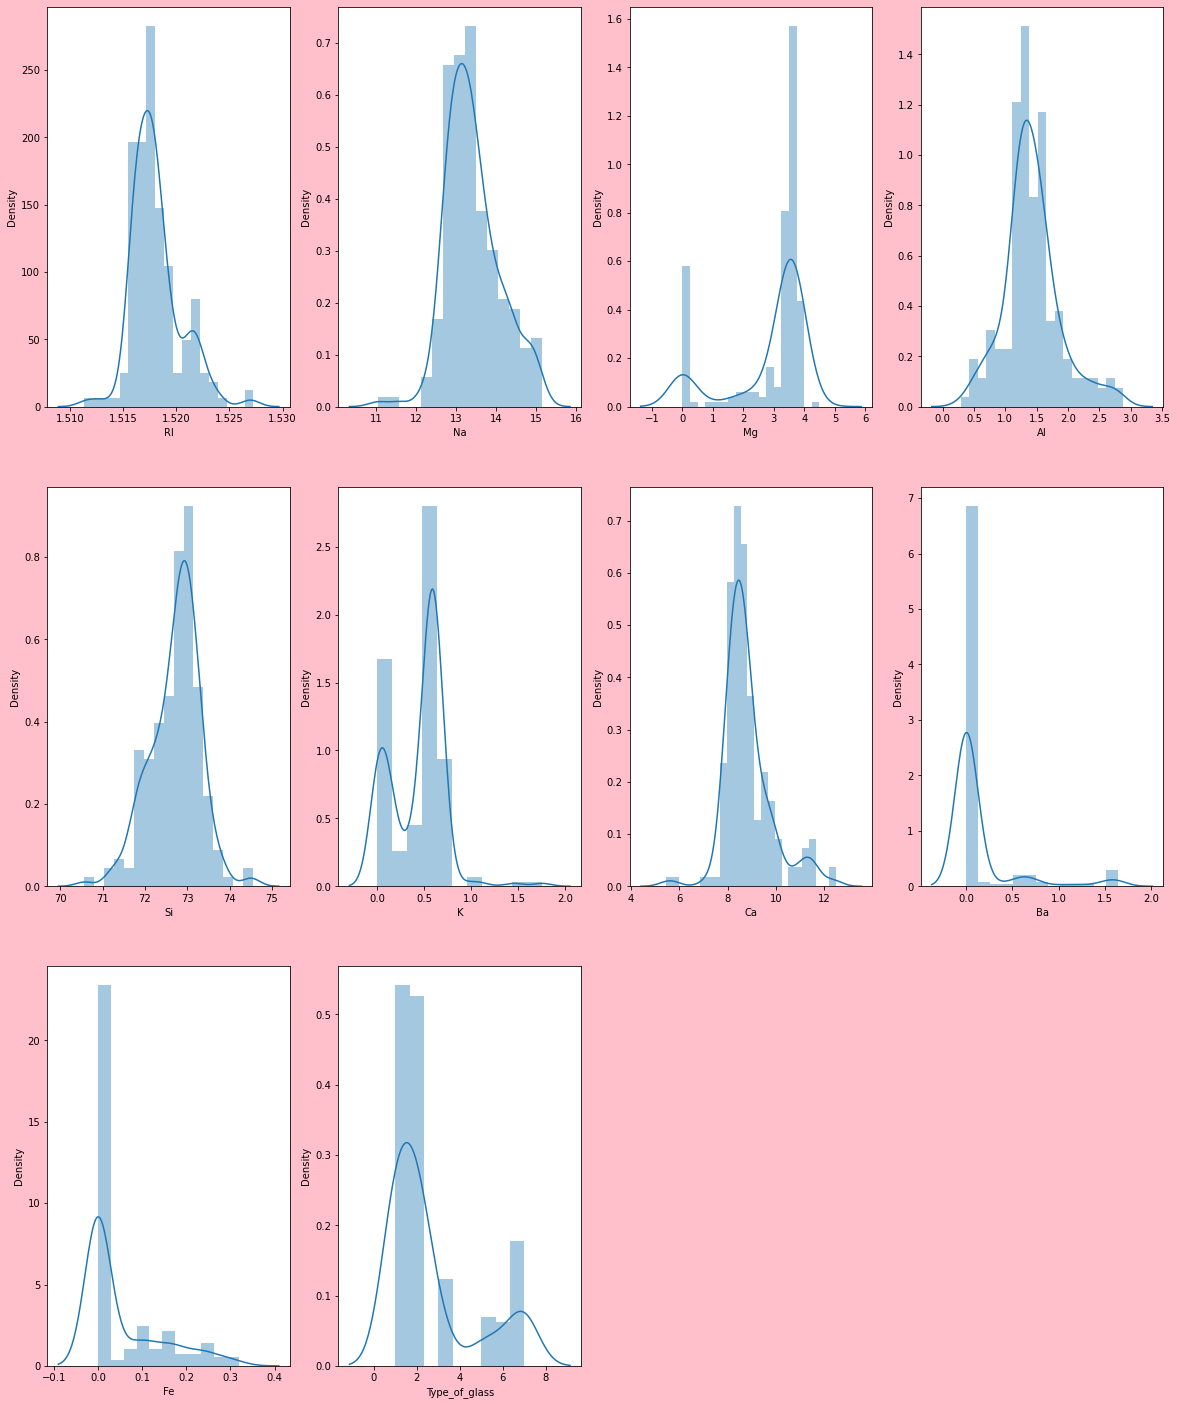

In [37]:
plt.figure(figsize=(20,25),facecolor = 'pink')
plotnumber = 1

for column in df:
    if plotnumber<=10:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    
    plotnumber+=1 
plt.show() 

after removing outlier our features data is approx normally distributed

In [39]:
X = df.drop('Type_of_glass', axis = 1)
y = df['Type_of_glass']


In [41]:
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(X), columns=X.columns)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.291781,0.332127,1.233397,-0.729105,-1.612464,-1.319609,-0.075653,-0.346292,-0.603056
1,-0.197832,0.704398,0.551581,-0.141722,0.016082,0.172091,-1.008147,-0.346292,-0.603056
2,-0.824346,0.168328,0.513277,0.264928,0.461790,-0.147559,-1.058826,-0.346292,-0.603056
3,-0.175926,-0.308179,0.620529,-0.299864,-0.189629,0.491741,-0.612851,-0.346292,-0.603056
4,-0.281075,-0.218834,0.566903,-0.412822,0.616073,0.420708,-0.764888,-0.346292,-0.603056
...,...,...,...,...,...,...,...,...,...
189,-0.727959,1.419158,-2.206325,2.975928,0.221793,-1.532708,0.633854,1.169695,-0.603056
190,-0.802440,1.076668,-2.206325,3.292211,-0.189629,-1.248575,0.360187,2.629534,-0.603056
191,-0.530805,2.238153,-2.206325,1.281553,0.581788,-1.532708,-0.430406,4.117447,-0.603056
192,1.134057,1.404267,-2.206325,1.349328,1.198921,-1.532708,-0.389863,4.257816,-0.603056


In [42]:
#NOW WE WILL BALANCE OUR TARGET VARIABLE
SM = SMOTE()
X, y = SM.fit_resample(X, y)

In [43]:
y.value_counts()

1    70
2    70
3    70
5    70
6    70
7    70
Name: Type_of_glass, dtype: int64

# MODEL BUILDING

In [45]:
#LET FIRST FIND THE BEST RANDOM STATE TO GET BEST ACCUARACY
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state = i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred = RFC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is",maxAccu,"at random_state",maxRS)

Best accuracy is 0.9682539682539683 at random_state 55


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=55)

# Logistic Regression

In [47]:
clf = LogisticRegression()

#Train Model
clf.fit(x_train, y_train)
# Prediction on Test and Train Set 
pred_logistic_test = clf.predict(x_test)
pred_logistic_train = clf.predict(x_train)

print("Training Accuracy: ", accuracy_score(y_train, pred_logistic_train))
print("Test Accuracy: ", accuracy_score(y_test, pred_logistic_test))

Training Accuracy:  0.7755102040816326
Test Accuracy:  0.7857142857142857


# Decision Tree¶

In [48]:
dt = DecisionTreeClassifier()

# Train model 
dt.fit(x_train, y_train)

pred_dt_test = dt.predict(x_test)
pred_dt_train = dt.predict(x_train)

print("Training Accuracy: ", accuracy_score(y_train, pred_dt_train))
print("Test Accuracy: ", accuracy_score(y_test, pred_dt_test))

Training Accuracy:  1.0
Test Accuracy:  0.9126984126984127


# Random Forest

In [49]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

train_pred_rf = rf.predict(x_train)
pred_rf = rf.predict(x_test)

print("Training Accuracy: ",accuracy_score(y_train, train_pred_rf))
print("Test Accuracy: ",accuracy_score(y_test, pred_rf))

Training Accuracy:  1.0
Test Accuracy:  0.9444444444444444


# Gradient Boost

In [50]:
gb = GradientBoostingClassifier()

# Training model
gb.fit(x_train, y_train)

# Prediction on test and train set
gb_pred_train = gb.predict(x_train)
gb_pred = gb.predict(x_test)

print("Training Accuracy: ",accuracy_score(y_train, gb_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, gb_pred))

Training Accuracy:  1.0
Test Accuracy:  0.9126984126984127


# Support Vector Machine (SVM)

In [52]:
from sklearn import svm

In [53]:
svc = svm.SVC(gamma = 0.01, C = 100)
svc.fit(x_train, y_train)

svc_pred_train = svc.predict(x_train)
svc_pred = svc.predict(x_test)
print("Training Accuracy: ",accuracy_score(y_train, svc_pred_train))
print("Test Accuracy: ",accuracy_score(y_test, svc_pred))

Training Accuracy:  0.8333333333333334
Test Accuracy:  0.7936507936507936


# Extra Tree

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(x_train, y_train)

et_pred_train = et.predict(x_train)
et_pred = et.predict(x_test)
print("Training Accuracy: ",accuracy_score(y_train, et_pred_train))
print("Test Accuracy: ",accuracy_score(y_test, et_pred))

Training Accuracy:  1.0
Test Accuracy:  0.9444444444444444


It seems that many of the model are overfitting but SVM model seems our best model with trainin accuracy o 83% and testing accuracy of 79& which is good so our best model is SVM

# HYPERPARAMETER TUNING

In [55]:
#lets perform hyper parameter tuning on our best model


In [56]:
param_grid = {'C' : [1,5,10,20], 'gamma' : [0.001,0.01,0.02,0.002]}
gridsearch= GridSearchCV(svc,param_grid)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'C': 20, 'gamma': 0.02}

In [74]:
FINAL_MODEL = svm.SVC(C=20,gamma=0.03)
FINAL_MODEL.fit(x_train,y_train)

SVC(C=20, gamma=0.03)

In [75]:
finalmod_pred = FINAL_MODEL.predict(x_test)
finalmod_acc = (accuracy_score(y_test, finalmod_pred))*100
print("Accuracy score for the Best Model is:", finalmod_acc)

Accuracy score for the Best Model is: 80.95238095238095


# saving the model

In [76]:
import pickle
filename = 'Glass_identification.pkl'
pickle.dump(FINAL_MODEL,open(filename,'wb'))#saved model

In [77]:
import pickle
loaded_model=pickle.load(open('Glass_identification.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

80.95238095238095
